## RLDMUU 2025
#### Beliefs and utility - St Petersburg paradox
jakub.tluczek@unine.ch

In [6]:
import numpy as np

Today we are going to take a look at St Petersburg Paradox. Imagine a game, where you put a wager and coss the coin. If it lands on heads, you win $2^{\text{round}}$, where round is an index of the round starting at 0. If it ever lands on tails, the game is over. An example game would look as follows:

- Round 1: heads, won 1 Fr.
- Round 2: heads, won 2 Fr.
- Round 3: heads, won 4 Fr.
- Round 4: tails, won 0 Fr., game over

The probability of the coin landing $n$ times on heads followed by one tails is $\frac{1}{2^{n+1}}$, while the sum of the winnings in this case would be $2^n$. If we were to use the linear utility $U(x) = x$, then the expected utility $\mathbb{E}\left[ U(x) \right] = \sum_{n=0}^{\infty} \frac{2^n}{2^{n+1}} = \infty$. If we would also factor in some gamble $k$ and initial capital $C$, which you would be required to pay upfront to pay the game, $\forall_{k,C} \sum_{n=0}^{\infty} \frac{C + 2^n - k}{2^{n+1}} = \infty$, therefore, according to the utility theory, paradoxically, you would be willing to pay maximum amount of money to enter, for any starting capital.

Fill out the function `st_petersburg_expected_utility` which will give you expected utility for given utility function. You can pass a simple linear utility function and check, for arbitraly large stopping points and payments, if the utility indeed grows infinitely.

In [25]:
def linear_utility(x):
    return x

def st_petersburg_expected_utility(initial_capital, gamble, utility_function, stopping=100):
    # TODO
    expected_utility = 0
    for i in range(1, stopping):
        initial_capital += initial_capital + (2**i) - gamble
        expected_utility += utility_function(initial_capital) / (2**(i+1))
    return expected_utility

Now instead of using linear utility implement following utility functions:
- $U(x) = \sqrt{x}$
- $U(x) = \log(x)$
- $U(x) = \text{crra}(x, \eta)$

Where crra is a constant relative risk aversness function, and is defined as:

$$
\text{crra}(x, \eta) =
\begin{cases}
\frac{x^{1-\eta}}{1-\eta} & \text{if } \eta > 0, \eta \neq 1 \\
\ln x & \text{if } \eta = 1
\end{cases}
$$

In [30]:
import math
def sqrt_utility(x):
    return x**(1/2)

def log_utility(x):
    return math.log(x) if x > 0 else 0

def crra_utility(x, eta=0.5):
    return (x ** (1 - eta)) / (1 - eta) if eta != 1 else np.log(x)

In [26]:
CAPITAL = 10_000
GAMBLE = 10
UTILITY = log_utility
print(f"Utility of playing:\t{st_petersburg_expected_utility(CAPITAL, GAMBLE, UTILITY)}")
print(f"Utility of not playing:\t{UTILITY(CAPITAL)}")

Utility of playing:	5.2980839769262955
Utility of not playing:	9.210340371976184


Using above utilities and `st_petersburg_expected_utility` check, what are the maximum bets $k$ given different capitals $C$, at which it would make sense to enter the game. You can use `pyplot` to plot the maximum bets for different capitals.

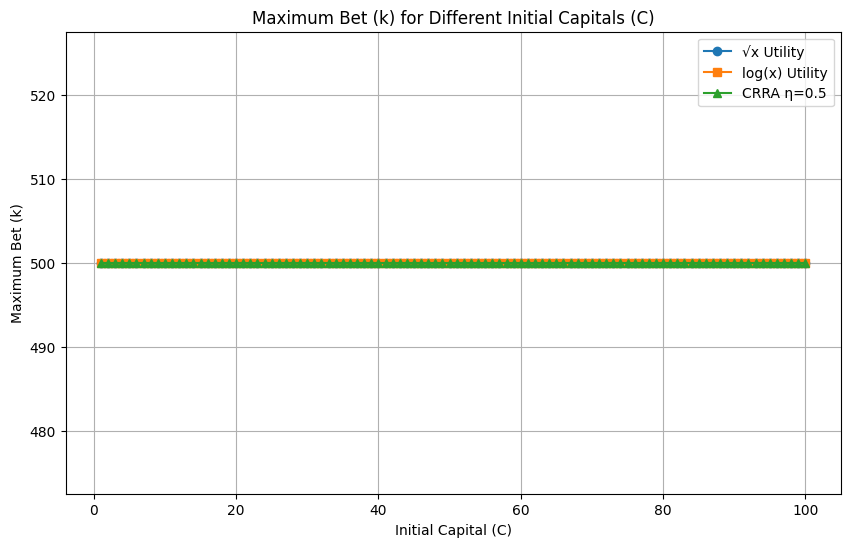

In [33]:
import matplotlib.pyplot as plt
def find_max_bet(initial_capital, utility_function, stopping=100, eta=None, max_search=500):
    for k in range(max_search):
        utility = st_petersburg_expected_utility(initial_capital, k, utility_function, stopping)
        # Compare the real part of utility with 0 if it's complex
        if isinstance(utility, complex):
            if utility.real < 0:
                return k - 1
        elif utility < 0:  # If utility is not complex, compare as before
            return k - 1
    return max_search

capitals = list(range(1, 101))
max_bets_sqrt = [find_max_bet(c, sqrt_utility) for c in capitals]
max_bets_log = [find_max_bet(c, log_utility) for c in capitals]
max_bets_crra_05 = [find_max_bet(c, crra_utility, eta=0.5) for c in capitals]

plt.figure(figsize=(10, 6))
plt.plot(capitals, max_bets_sqrt, label="√x Utility", marker="o")
plt.plot(capitals, max_bets_log, label="log(x) Utility", marker="s")
plt.plot(capitals, max_bets_crra_05, label="CRRA η=0.5", marker="^")
# plt.plot(capitals, max_bets_crra_1, label="CRRA η=1 (log)", marker="v")

plt.xlabel("Initial Capital (C)")
plt.ylabel("Maximum Bet (k)")
plt.title("Maximum Bet (k) for Different Initial Capitals (C)")
plt.legend()
plt.grid()
plt.show()